In [1]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt

# Splines
from scipy.interpolate import interp1d

In [2]:
SaveFig = True

# Transcribe Data

In [3]:
data = np.array([[ 203.41 , -89.37 ],
                 [ 203.435, -94.88 ],
                 [ 203.46 , -101.25 ],
                 [ 203.484, -106.52 ],
                 [ 203.509, -108.66 ],
                 [ 203.534, -114.25 ],
                 [ 203.558, -114.30 ],
                 [ 203.583, -117.66 ],
                 [ 203.608, -122.45 ]])

sol = data[:,0]
temp = data[:,1]

# Visualize Data

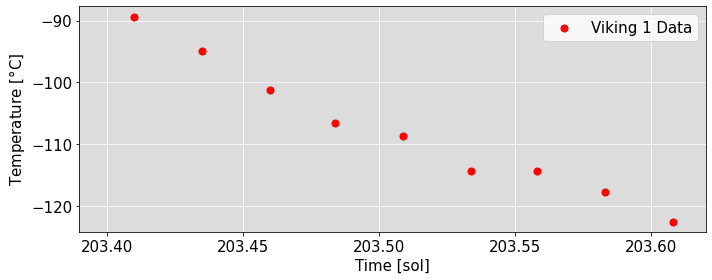

In [4]:
fig, ax = plt.subplots(figsize=(10,4))

ax.set_facecolor('gainsboro')
ax.grid(color='white')

ax.scatter(sol, temp, s=50, color='r', label='Viking 1 Data', zorder=3)

ax.legend(prop={'size':15})

ax.set_xlabel('Time [sol]', fontsize=15)
ax.set_ylabel(r'Temperature [$\degree$C]', fontsize=15)

plt.xlim(203.39,203.62)
ax.set_xticks(np.arange(203.40, 203.61, 0.05))
ax.set_yticks(np.arange(-120,-89,10))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

if SaveFig:
    plt.tight_layout()
    plt.savefig('Plots/5_1.pdf')

plt.show()

# Problem (5A)

In [5]:
# Define linear spline
linear_spline = interp1d(sol, temp, kind='linear')

# Define cubic spline
cubic_spline = interp1d(sol, temp, kind='cubic')

In [6]:
# Define sol's to estimate temperature at
sol_est = 203.570
print(f'The LINEAR spline estimates the temperatur at {sol_est} sol to be {linear_spline(sol_est):.4f} degrees')
print(f'The CUBIC spline estimates the temperatur at {sol_est} sol to be {cubic_spline(sol_est):.4f} degrees')

The LINEAR spline estimates the temperatur at 203.57 sol to be -115.9128 degrees
The CUBIC spline estimates the temperatur at 203.57 sol to be -115.3253 degrees


# Problem (5B)

In [7]:
# Define array to evaluate spline in
xlim = (203.410, 203.608)
N_points = 250
x_arr = np.linspace(*xlim, N_points)
resolution = x_arr[1] - x_arr[0]

# Use splines
y_linear = linear_spline(x_arr)
y_cubic = cubic_spline(x_arr)

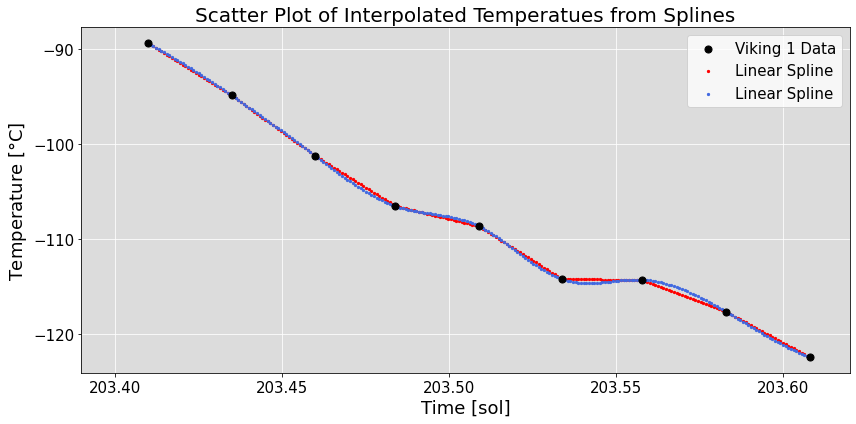

In [8]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_facecolor('gainsboro')
ax.grid(color='white')

# Plot data
ax.scatter(sol, temp, s=50, color='k', label='Viking 1 Data', zorder=3)

# Plot splines
ax.scatter(x_arr, y_linear, s=5, color='r', label='Linear Spline', zorder=2)
ax.scatter(x_arr, y_cubic, s=5, color='royalblue', label='Linear Spline', zorder=2)

# Pretty
ax.legend(prop={'size':15})

ax.set_title('Scatter Plot of Interpolated Temperatues from Splines', fontsize=20)
ax.set_xlabel('Time [sol]', fontsize=18)
ax.set_ylabel(r'Temperature [$\degree$C]', fontsize=18)

plt.xlim(203.39,203.62)
ax.set_xticks(np.arange(203.40, 203.61, 0.05))
ax.set_yticks(np.arange(-120,-89,10))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

if SaveFig:
    plt.tight_layout()
    plt.savefig('Plots/5_2.pdf')
    
plt.show()

We check whether the temperature is continously dropping, by taking the difference between points: temp[i] - temp[i-1]. If this value is ever positive, the first value (i-1) is largest, and the temperature has not dropped.

In [9]:
# Compute differences
linear_diff = np.diff(y_linear)
cubic_diff = np.diff(y_cubic)

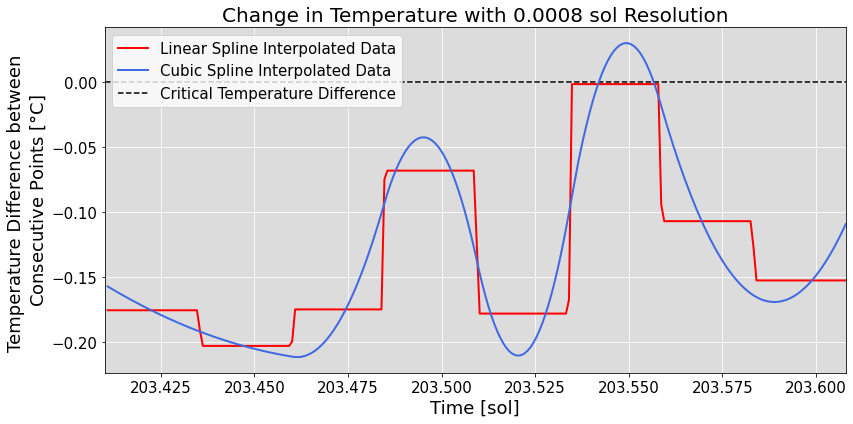

In [10]:
# Plot results
fig, ax = plt.subplots(figsize=(12,6))

ax.set_facecolor('gainsboro')
ax.grid(color='white')

# Plot differences
x_diff = xlim[0] + np.cumsum( np.diff(x_arr) )
ax.plot(x_diff, linear_diff, color='r', linewidth=2,  label='Linear Spline Interpolated Data')
ax.plot(x_diff, cubic_diff, color='royalblue', linewidth=2, label='Cubic Spline Interpolated Data')

# Mark the cross to positive vals
ax.hlines(0, *xlim, color='k', linestyle='dashed', label='Critical Temperature Difference')

# Pretty
ax.legend(prop={'size':15})

ax.set_title(f'Change in Temperature with {resolution:.4f} sol Resolution', fontsize=20)
ax.set_xlabel('Time [sol]', fontsize=18)
ax.set_ylabel(f'Temperature Difference between \nConsecutive Points'+ f' [$\degree$C]', fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlim(*xlim)

if SaveFig:
    plt.tight_layout()
    plt.savefig('Plots/5_3.pdf')

plt.show()

In [11]:
# Time interval to be careful of with the cubic spline
cubic_mask = np.where(cubic_diff >= 0)
cubic_danger_interval = x_diff[cubic_mask]
print(f'The cubic spline violates the condition in the time interval {cubic_danger_interval[0]:.4f} sol to'
      + f' {cubic_danger_interval[-1]:.4f} sol')

# Check linear for good measure
linear_mask = np.where(linear_diff >= 0)
linear_danger_interval = x_diff[linear_mask]
linear_danger_interval

The cubic spline violates the condition in the time interval 203.5428 sol to 203.5563 sol


array([], dtype=float64)

# Problem (5C)

In [12]:
# To solve this we need to evaluate the splines at points that are seperated by 0.0004 sol 
# and repeat the procedure from 5B
sol_resolution = 0.0004

# Define array to evaluate spline in
x_arr = np.arange(np.min(sol)+1e-3, np.max(sol), sol_resolution)

# Use splines
y_linear = linear_spline(x_arr)
y_cubic = cubic_spline(x_arr)

# Compute differences
linear_diff = np.diff(y_linear)
cubic_diff = np.diff(y_cubic)

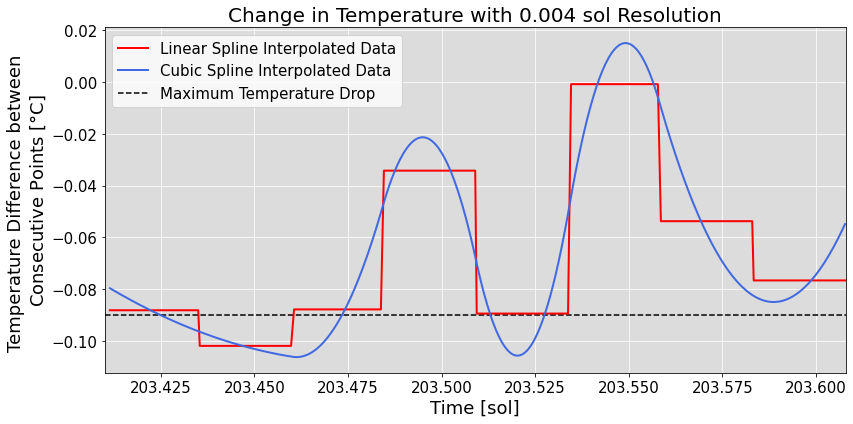

In [13]:
# Plot results
fig, ax = plt.subplots(figsize=(12,6))

ax.set_facecolor('gainsboro')
ax.grid(color='white')

# Plot differences
x_diff = np.min(sol)+1e-3 + np.cumsum( np.diff(x_arr) )
ax.plot(x_diff, linear_diff, color='r', linewidth=2,  label='Linear Spline Interpolated Data')
ax.plot(x_diff, cubic_diff, color='royalblue', linewidth=2, label='Cubic Spline Interpolated Data')

# Mark the cross to positive vals
ax.hlines(-0.09, *xlim, color='k', linestyle='dashed', label='Maximum Temperature Drop')

# Pretty
ax.legend(prop={'size':15})

ax.set_title('Change in Temperature with 0.004 sol Resolution', fontsize=20)
ax.set_xlabel('Time [sol]', fontsize=18)
ax.set_ylabel(f'Temperature Difference between \nConsecutive Points'+ f' [$\degree$C]', fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlim(*xlim)

if SaveFig:
    plt.tight_layout()
    plt.savefig('Plots/5_4.pdf')

plt.show()

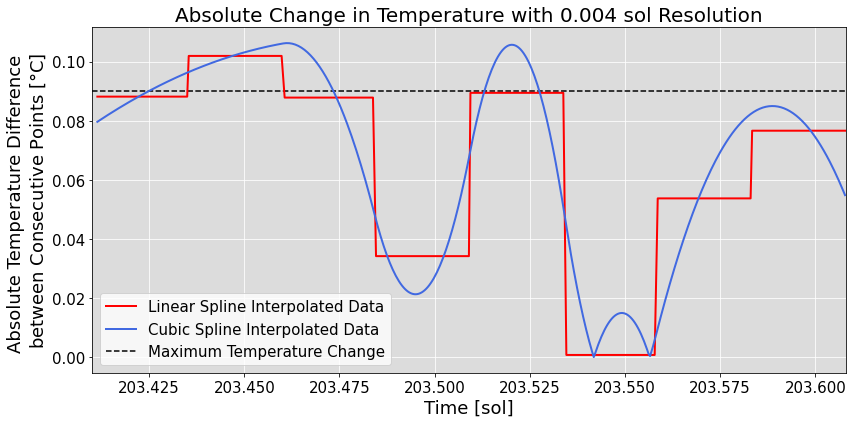

In [14]:
# Plot results
fig, ax = plt.subplots(figsize=(12,6))

ax.set_facecolor('gainsboro')
ax.grid(color='white')

# Plot differences
x_diff = np.min(sol)+1e-3 + np.cumsum( np.diff(x_arr) )
ax.plot(x_diff, np.abs(linear_diff), color='r', linewidth=2,  label='Linear Spline Interpolated Data')
ax.plot(x_diff, np.abs(cubic_diff), color='royalblue', linewidth=2, label='Cubic Spline Interpolated Data')

# Mark the cross to positive vals
ax.hlines(0.09, *xlim, color='k', linestyle='dashed', label='Maximum Temperature Change')

# Pretty
ax.legend(prop={'size':15})

ax.set_title('Absolute Change in Temperature with 0.004 sol Resolution', fontsize=20)
ax.set_xlabel('Time [sol]', fontsize=18)
ax.set_ylabel(f'Absolute Temperature Difference \nbetween Consecutive Points'+ f' [$\degree$C]', fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlim(*xlim)

if SaveFig:
    plt.tight_layout()
    plt.savefig('Plots/5_5.pdf')

plt.show()

electronics no good, big sad